In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/6/2017/11/04133712/waterfall.jpg


--2021-11-28 03:57:53--  https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/6/2017/11/04133712/waterfall.jpg
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.251.32
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.251.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1760735 (1.7M) [image/jpeg]
Saving to: ‘waterfall.jpg’

waterfall.jpg       100%[===================>]   1.68M  1.70MB/s    in 1.0s    

2021-11-28 03:57:55 (1.70 MB/s) - ‘waterfall.jpg’ saved [1760735/1760735]



In [ ]:
from skimage.io import imread
im = imread ('waterfall.jpg')
from skimage.transform import resize


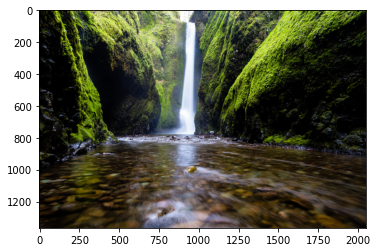

In [ ]:
plt.imshow(im)


In [ ]:
im_small = resize(im, (im.shape[0] // 10, im.shape[1] // 10), anti_aliasing=True)

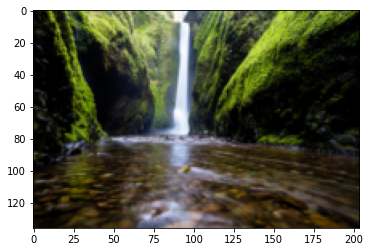

In [ ]:
plt.imshow(im_small)

In [ ]:
from sklearn.cluster import KMeans
# each row of data is a pixel
data = np.reshape(im_small, (np.shape(im_small)[0] * np.shape(im_small)[1], 3))

np.shape(data)


kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
#kmeans.cluster_centers_


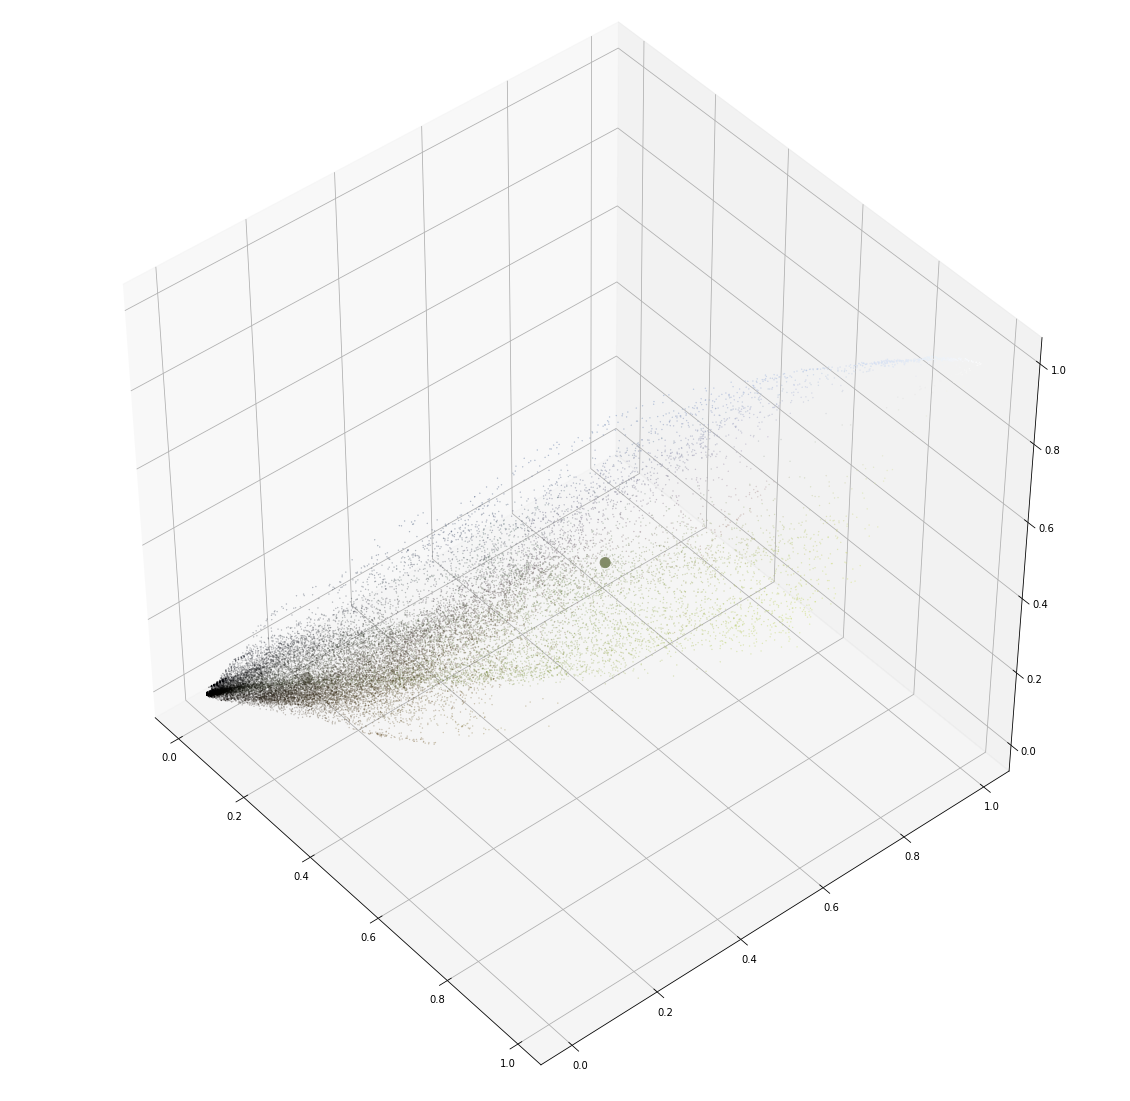

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=45., azim=-40)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data, s=0.1)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2], c=kmeans.cluster_centers_, s=100, marker='o')




In [ ]:
new_data = np.array(data)
for row in range(np.shape(new_data)[0]):
  #print(new_data[row,:])
  new_data[row, :] = kmeans.cluster_centers_[kmeans.labels_[row], :]

In [ ]:
new_image = np.reshape(new_data, (im.shape[0] // 10, im.shape[1] // 10, 3))
np.shape(new_image)

(136, 204, 3)

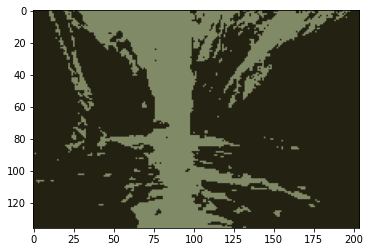

In [ ]:
plt.imshow(new_image)

In [ ]:
new_data

array([[0.13723791, 0.13179294, 0.07135361],
       [0.13723791, 0.13179294, 0.07135361],
       [0.13723791, 0.13179294, 0.07135361],
       ...,
       [0.13723791, 0.13179294, 0.07135361],
       [0.13723791, 0.13179294, 0.07135361],
       [0.13723791, 0.13179294, 0.07135361]])

In [3]:
for i in range(2,10, 2):
  print(i)

2
4
6
8
